# Google Data Analytics Capstone: How can a wellness company play it smart?
## Project completed by Ahmad Azri, date 20230324

## Table of Content
* [Introduction](#section-one)
* [Ask](#section-two)
    - [Business Objective](#subsection-one)
    - [Key Stakeholder](#anything-you-like)
* [Prepare](#section-four)
* [Process](#section-five)
* [Conclusion](#section-three)

<a id="section-one"></a>
# Introduction

Bellabeat is a high-tech manufacturer of health-focused products for women, founded by Urška Sršen and Sando Mur in 2013. Their products collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits.

Bellabeat has launched 5 products:

Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. It helps users better understand their current habits and make healthy decisions.

Leaf: Bellabeat's classic wellness tracker can be worn as a bracelet, necklace, or clip. It connects to the Bellabeat app to track activity, sleep, and stress.

Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. It connects to the Bellabeat app to provide you with insights into your daily wellness.

Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. It connects to the Bellabeat app to track your hydration levels.

Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. It gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

<a id="section-two"></a>
# Ask

<a id="subsection-one"></a>
## Business Objective
 
1. What are some trends in smart device usage?

2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat marketing strategy?

<a id="anything-you-like"></a>
## Key Stakeholder

1. Urška Sršen: cofounder and Chief Creative Officer.

2. Sando Mur: cofounder and a key member of the Bellabeat executive team.

3. Bellabeat marketing analytics team.

<a id="section-four"></a>
# Prepare

1. Where is your data stored? 
		A: Stored on desktop & named as "FitabaseData20160412_20160512"
		A: Good file name since it has, a) underscore, b) date format in "yyyymmdd"
        

2. How is the data organized? Is it in long or wide format?
		A: Data is organized in Long & Wide List
        

3. Are there issues with bias or credibility in this data? Does your data ROCCC?
		A: Reliable -- LOW -- Sample size is not reliable. Data only collected from 30 users whereby the total Fitbit users as of 2021 are 111m.
		A: Original -- LOW -- Data is collected through a survey from Amazon Mechanical Turk. 
		A: Current -- LOW -- Data is too outdated which is > 5 years. Less relevant, 
		A: Comprehensive -- Medium -- Some of the data from Fitbit match with Bellabeat Product. Fitbit products may have a more products. 
		A: Cited --  UNKNOWN -- Data is collected from third party.


4. How did you verify the data’s integrity? 
		A: By checking the data completeness, accuracy, consistency and trustworthiness.


5. Are there any problems with the data?
		A: Data is not really reliable for analysis due to the issues mentioned above on ROCCC.


<a id="section-five"></a>
# Process

Kindly noted that in this phase, I've conducted data-cleaning and data-transforming in both Spreadsheet and R.


	● Data cleaning & Transforming (Spreadsheets)
		a. Used UNIQUE function to obtain the Unique ID. The actual sampling is 33 respondents instead of 30.
		b. Used filter to check blank cell.
		c. Formatted any numerical data with "Number" format with either no decimals or up to 2 decimals point.
		d. Create a copy document & conduct data cleaning in backup spreadsheet.
		e. Used Countif function to see the total number of days. Details of Daily_Activity data;
			1. Expected output is: 1023 days.
			2. Actual output is: 940 days.
			3. Total missing day is: 83 days.
		f. Separate Date & Hour into two different columns. Date formula: MM/DD/YY. Time formula: H:MM:SS -- To align with original data and standardization purpose.

		# Approach with insufficient data; is to conduct the analysis & align it with data that I currently have.
		Some limitation will be apply in final outcome.
        
        
	● Data cleaning & Transforming (Rstudio)
		a. after a quick view on each dataset, i found that there are number of null and non-null values - 
		b. able to see data type of every columns (chr, dbl, etc) 
		c. problem with timestamp. 2 table in my analysis contains date time format. 1 table has only date format. 
		d. checking how many unique ID from each datasets using "n_distinct".
        
        Detail of data cleaning & transforming in Rstudio will be shown in below markdown and code chunk.

In [5]:
# install important packages

install.packages("tidyverse") 
install.packages("skimr")
install.packages("janitor")
install.packages("here")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
# load libraries 

library(tidyverse)  
library(ggplot2)        # data viz
library(dplyr)          # data manipulation
library(readr)          # to read csv
library(lubridate)      # to work with date and time
library(here)           # for referencing
library(janitor)        # data cleaning
library(skimr)          # data cleaning

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date


here() starts at /kaggle/working


Attaching package: ‘here’


The following object is masked from ‘package:lubridate’:

    here



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘skimr’


The following object is masked from ‘package:stats’:

    filter




In [8]:
# import datasets to my environment and rename the table

activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepday <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightloginfo <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Parsed with column specification:
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)

Parsed with column specification:
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)

Parsed with column specification:
cols(
  Id = col_double(),
  Date = col_character(),
  WeightKg = col_double(),
  WeightPounds = col_double(),
  Fat = col_double(),
  BMI = col_double(),
  IsManualReport = col_logical(),
  LogId 

In [9]:
# quick view on dailyactivity dataset

head(activity)     # to view first 6 rows
glimpse(activity)  # to see the summary of dataset
str(activity)      # to determine the data structure

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Observations: 940
Variables: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 15039603…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 1301…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, …
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 2…
$ LightlyActiveMinut

In [10]:
# quick view on sleepday dataset

head(sleepday)          # to view first 6 rows
glimpse(sleepday)       # to see the summary of dataset
str(sleepday)           # to determine the data structure

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Observations: 413
Variables: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", …
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, …
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, …
Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num  346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  .

In [12]:
# quick view on weight dataset

head(weightloginfo)            # to view first 6 rows
glimpse(weightloginfo)         # to see the summary of dataset
str(weightloginfo)             # to determine the data structure

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Observations: 67
Variables: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 287321…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3,…
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.…
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25…
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12…
Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ Weigh

***Now that I have done viewing each dataset, I will begin with cleaning & transforming the dataset. Based on my observation towards all 3 dataset, I found out that date column of each file are in "chr" format. Thus, in below activity, I will fix and standardize the data type of date column***

In [13]:
# data cleaning by cleaning column names

activity <- clean_names(activity)
sleep <- clean_names(sleepday)
weight <- clean_names(weightloginfo)

head(activity)
head(sleep)
head(weight)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [14]:
# data cleaning by checking total unique ID in each dataset

n_distinct(activity$id)
n_distinct(sleep$id)
n_distinct(weight$id)

[1] 33

[1] 24

[1] 8

In [15]:
# data transforming

activity <- activity %>% 
  rename(date = activity_date) %>% 
  mutate(date= as_date(date, format= "%m/%d/%Y"))

sleep <- sleep %>% 
  rename(date = sleep_day) %>% 
  mutate(date= as_date(date, format= "%m/%d/%Y  %I:%M:%S %p", tz= Sys.timezone()))

weight <- weight %>% 
  mutate(date= as_date(date, format= "%m/%d/%Y  %I:%M:%S %p", tz= Sys.timezone()))

glimpse(activity)
glimpse(sleep)
glimpse(weight)

ERROR: Error in strptime(x, format, tz): invalid 'tz' value


***After transforming the data, I will explore the statistic summary for each dataset.***

In [17]:
# exploring summary statistic 

activity %>%  
  select(total_steps,
         total_distance,
         calories,
         sedentary_minutes) %>%
  summary()

sleep %>%  
  select(total_sleep_records,
         total_minutes_asleep,
         total_time_in_bed) %>%
  summary()

weight %>%  
  select(weight_kg,
         bmi) %>%
  summary()


  total_steps    total_distance      calories    sedentary_minutes
 Min.   :    0   Min.   : 0.000   Min.   :   0   Min.   :   0.0   
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828   1st Qu.: 729.8   
 Median : 7406   Median : 5.245   Median :2134   Median :1057.5   
 Mean   : 7638   Mean   : 5.490   Mean   :2304   Mean   : 991.2   
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793   3rd Qu.:1229.5   
 Max.   :36019   Max.   :28.030   Max.   :4900   Max.   :1440.0   

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.000       Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.000       1st Qu.:361.0        1st Qu.:403.0    
 Median :1.000       Median :433.0        Median :463.0    
 Mean   :1.119       Mean   :419.5        Mean   :458.6    
 3rd Qu.:1.000       3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.000       Max.   :796.0        Max.   :961.0    

   weight_kg           bmi       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

**Findings of dataset summary**;

1. Average of sedentary_minutes is 991.2 (equal to 16.52 hrs) which indicate most participants are not active. 
2. Average of walking distance is 5.49 km whereby the recommended distance is 8 km per day.
3. Average of total steps are 7638 whereby the recommended steps are 10,000 per day.
4. Average of total_minutes_asleep is 419.5 mins which equal to 6.99 hrs.
5. Average of BMI is 25.19 which is slightly higher than recommended.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Saving 12.5 x 6.67 in image

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



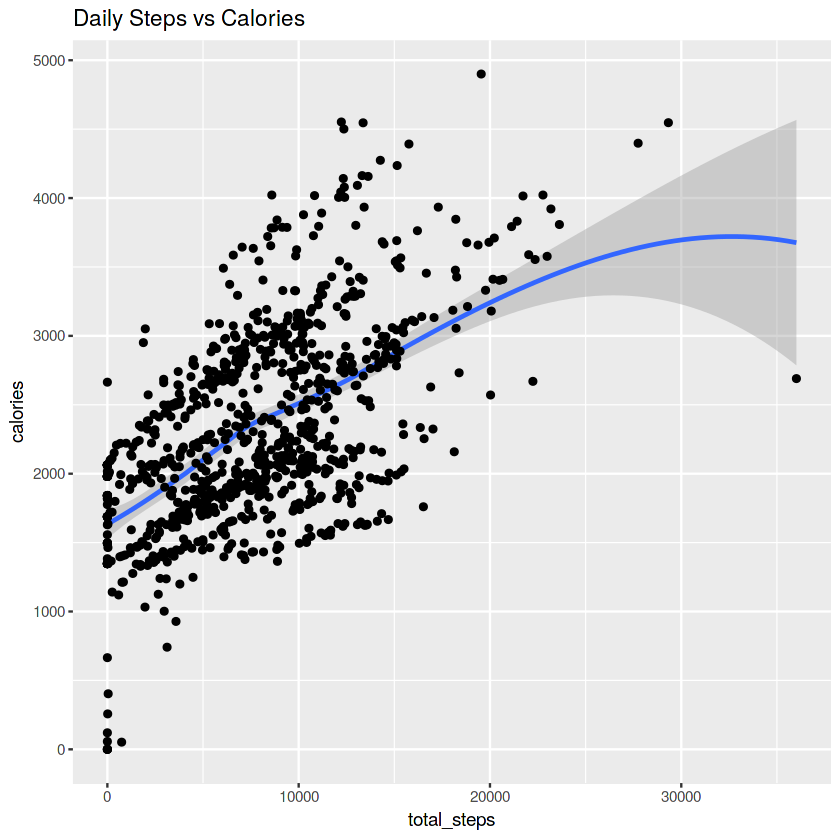

In [18]:
# analysis of daily steps vs calories

ggplot(data = activity)+
  geom_smooth(mapping = aes(x = total_steps, y = calories))+
  geom_point(mapping = aes(x = total_steps, y = calories))+
  labs(title = "Daily Steps vs Calories")
ggsave("Daily Steps vs Calories.png")

Daily Steps vs Calories finding:

Based on above plot, there is a positive trend/correlation between total steps and calories. This indicate that the more steps users made, the more calories will get burn.

Saving 12.5 x 6.67 in image



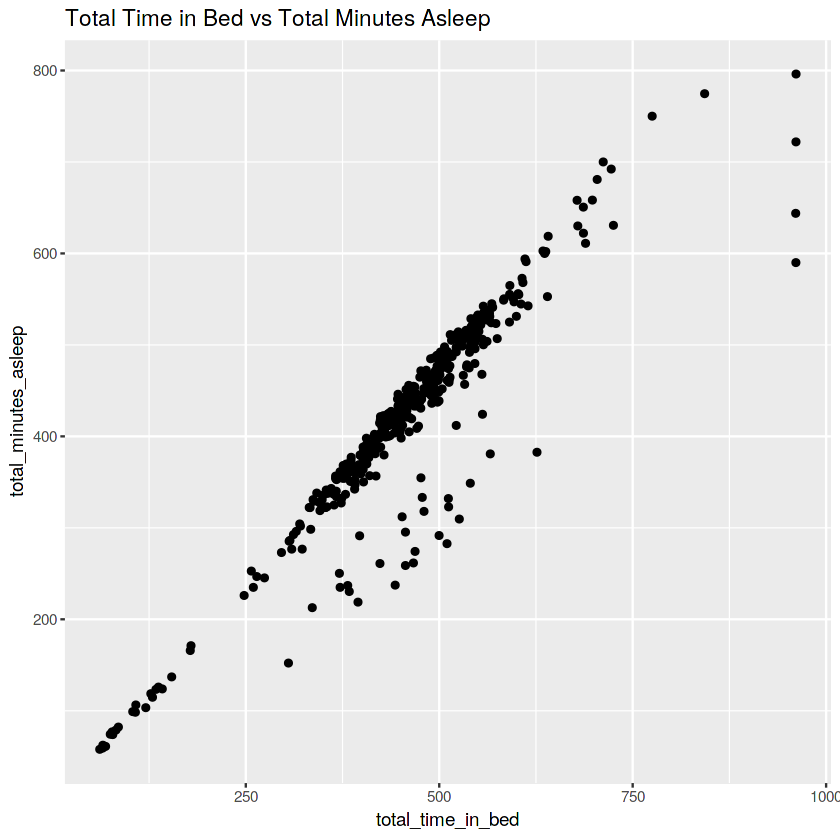

In [19]:
# analysis of total mins asleep vs total time in bed

ggplot(data = sleep)+
  geom_jitter(mapping = aes(x = total_time_in_bed, y = total_minutes_asleep))+
  labs(title = "Total Time in Bed vs Total Minutes Asleep")
ggsave("Total Time in Bed vs Total Minutes Asleep.png")

Total Time in Bed vs Total Minutes Asleep finding;

According to the plot above, we able to see and conclude that there is a positive trend between Total Time in Bed and Total Mins Asleep. To simply put, the longer someone stay in bed, the longer period of their sleep.

In [20]:
# merge dataset activity & sleep by left join. view new dataset, view total id, transform NA to 0

activity_sleep <- merge(x= activity, y= sleep, by.activity = c("id", "date"), by.sleep = c("id", "date"), all.x = TRUE)
activity_sleep [is.na(activity_sleep)] <- 0
n_distinct(activity_sleep$id)
head(activity_sleep)

[1] 33

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/19/2016 12:00:00 AM,1,304,320


Saving 12.5 x 6.67 in image



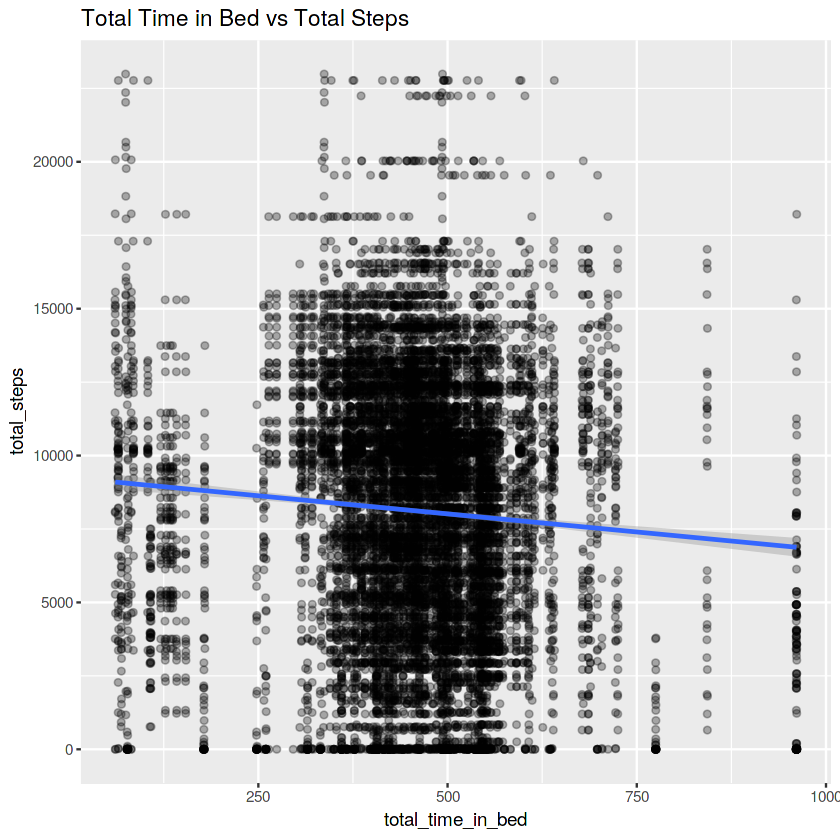

In [21]:
# analysis of total time in bed vs total steps

activity_sleep %>% 
  filter(total_time_in_bed > 0) %>% 
  ggplot(aes(x= total_time_in_bed, y= total_steps))+
  geom_point(alpha = 0.3,  position = position_jitter()) + stat_smooth(method = "lm")+
  labs(title = "Total Time in Bed vs Total Steps")
ggsave("Total Time in Bed vs Total Steps.png")

Total time in bed vs total steps finding;

According to the plot above, we may conclude that there is no correlation between the two variables. We can see that in the range of 250 mins ~ 500 mins users'sleep duration, the steps are increased although users staying in their bed. 

<a id="section-three"></a>
# Conclusion & Business Recommendation

Based on the analysis conducted, below is my recommendations for Bellabeat key stakeholder in order to improve their products;

1. There is a clear relationship between steps and calories burnt. This can showcase to the customers the benefits of tracking step in achieving weight loss goals or maintaining customers health. 

2. A marketing strategy can be implemented to tell about how many sufficient step is needed in order to help users achieve their goal.

3. There is a positive trend between total time in bed and total time asleep. This can showcase to the customers by setting a trigger to inform them by being more active. Marketing team may need to consider what is the current or viral trend that as possible for user to do by sending a bot through their device. This way, it's not only giving a reminder to customer, but it's also provide a suggestiong for interesting activity.

4. As the data quality is not that great based on POCCC method, all the above recommendations required further validation.

Credits to @nnnnick for teaching me this!